imports

In [1]:
from ultralytics import YOLO

import os
from PIL import Image
import shutil
import pathlib

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from ipywidgets import widgets
from io import BytesIO

import albumentations as A
import cv2
import numpy as np

instantiating gpu use

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}')

device: cuda


In [3]:
TRAIN_IMG_DIR = 'data/images/train'
VAL_IMG_DIR   = 'data/images/val'
TEST_IMG_DIR = 'data/images/test'

In [4]:
print(f"total training fish images: {len(os.listdir(TRAIN_IMG_DIR))}")
print(f"total validation fish images: {len(os.listdir(VAL_IMG_DIR))}")
print(f"total testing fish images: {len(os.listdir(TEST_IMG_DIR))}")

total training fish images: 2
total validation fish images: 0
total testing fish images: 0


In [5]:
TRAIN_LABELS_DIR = 'data/labels/train'
VAL_LABELS_DIR   = 'data/labels/val' 
TEST_LABELS_DIR = 'data/labels/test'

In [6]:
print(f"total training arrow labels: {len(os.listdir(TRAIN_LABELS_DIR))}")
print(f"total validation arrow labels: {len(os.listdir(VAL_LABELS_DIR))}")
print(f"total testing arrow labels: {len(os.listdir(TEST_LABELS_DIR))}")

total training arrow labels: 2
total validation arrow labels: 0
total testing arrow labels: 0


all the data we have

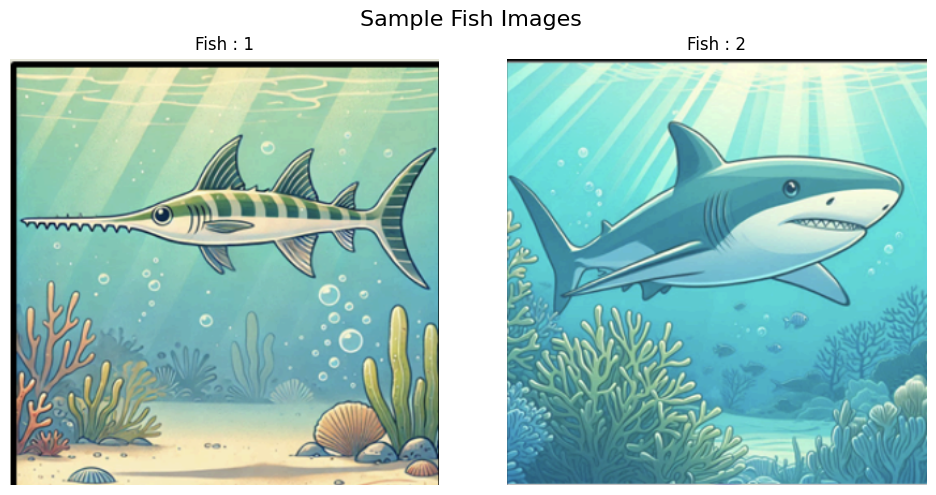

In [7]:
fish_images = [os.path.join(TRAIN_IMG_DIR, filename) for filename in os.listdir(TRAIN_IMG_DIR) 
                if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Sample Fish Images', fontsize=16)

for i in range(2):
    img = Image.open(fish_images[i])
    axes[i].imshow(img)
    axes[i].set_title(f'Fish : {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

after augmentation , creating a model

In [13]:
model = YOLO('yolov8n.pt')
model.info()

100%|██████████| 6.25M/6.25M [00:21<00:00, 301kB/s]


YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [14]:
model.train(
    data='config.yaml',
    epochs=120,            
    patience=10,           
    batch=4,              
    device=0,
    freeze=0,              
    optimizer='AdamW',     
    lr0=0.0001,            
    lrf=0.001,             
    weight_decay=0.001,    
    warmup_epochs=3,       
    warmup_bias_lr=0.05,   
    dropout=0.2,            
)

Ultralytics 8.3.170 🚀 Python-3.13.5 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7797MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=config.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.2, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=0, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.001, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretra

100%|██████████| 5.35M/5.35M [00:23<00:00, 236kB/s] 


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2387.6±1288.2 MB/s, size: 71.1 KB)


train: Scanning /home/pranav/Projects/Final_AUV/shark_sawfish/data/labels/train... 164 images, 32 backgrounds, 0 corrupt: 100%|██████████| 164/164 [00:00<00:00, 4257.83it/s]

train: New cache created: /home/pranav/Projects/Final_AUV/shark_sawfish/data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1447.0±871.9 MB/s, size: 63.5 KB)


val: Scanning /home/pranav/Projects/Final_AUV/shark_sawfish/data/labels/val... 36 images, 6 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<00:00, 1851.84it/s]

val: New cache created: /home/pranav/Projects/Final_AUV/shark_sawfish/data/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120     0.588G      1.113      3.061      1.601          8        640: 100%|██████████| 41/41 [00:02<00:00, 17.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 18.48it/s]

                   all         36         30    0.00366          1      0.255      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120     0.723G     0.8961      2.586      1.469         10        640: 100%|██████████| 41/41 [00:01<00:00, 23.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 33.66it/s]


                   all         36         30    0.00351          1      0.434      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120     0.738G     0.8774      2.375      1.433         13        640: 100%|██████████| 41/41 [00:01<00:00, 24.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 33.23it/s]


                   all         36         30      0.483      0.652       0.55      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120     0.756G     0.8124      2.252      1.398          8        640: 100%|██████████| 41/41 [00:01<00:00, 24.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.87it/s]

                   all         36         30      0.557      0.631      0.613      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120     0.773G     0.7889      2.121      1.373          7        640: 100%|██████████| 41/41 [00:01<00:00, 24.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 33.05it/s]


                   all         36         30      0.611      0.614      0.589      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120     0.791G     0.7965      2.044      1.379         11        640: 100%|██████████| 41/41 [00:01<00:00, 24.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 29.53it/s]

                   all         36         30      0.605      0.639      0.594      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120     0.809G     0.8358      2.043      1.382          5        640: 100%|██████████| 41/41 [00:01<00:00, 24.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 33.06it/s]


                   all         36         30       0.62      0.568      0.608      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120     0.824G     0.7883      1.951      1.315          8        640: 100%|██████████| 41/41 [00:01<00:00, 24.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 31.50it/s]

                   all         36         30       0.56      0.563      0.605      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120     0.842G     0.7462      1.879      1.311          6        640: 100%|██████████| 41/41 [00:01<00:00, 24.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.57it/s]

                   all         36         30      0.521      0.622      0.688      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120     0.859G      0.733      1.828      1.322          7        640: 100%|██████████| 41/41 [00:01<00:00, 24.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.48it/s]

                   all         36         30      0.871      0.572      0.794      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120     0.875G     0.7444      1.827        1.3         11        640: 100%|██████████| 41/41 [00:01<00:00, 24.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.58it/s]


                   all         36         30       0.86      0.736      0.863        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120     0.893G     0.6632      1.714      1.237          9        640: 100%|██████████| 41/41 [00:01<00:00, 24.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.67it/s]

                   all         36         30      0.851      0.793      0.905      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      0.91G     0.6751      1.636      1.256          9        640: 100%|██████████| 41/41 [00:01<00:00, 24.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.86it/s]

                   all         36         30       0.84      0.835       0.91      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120     0.928G     0.6614      1.594      1.238         12        640: 100%|██████████| 41/41 [00:01<00:00, 24.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 31.68it/s]

                   all         36         30      0.876      0.805      0.919       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120     0.943G     0.6826      1.604      1.276          5        640: 100%|██████████| 41/41 [00:01<00:00, 24.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.90it/s]

                   all         36         30      0.896      0.805      0.905      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120     0.961G     0.6823      1.497      1.244          5        640: 100%|██████████| 41/41 [00:01<00:00, 24.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 33.02it/s]

                   all         36         30      0.858      0.868      0.908      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120     0.979G     0.7079      1.437      1.271          8        640: 100%|██████████| 41/41 [00:01<00:00, 24.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 31.57it/s]

                   all         36         30      0.928      0.868      0.926      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120     0.996G     0.6502      1.558      1.261          8        640: 100%|██████████| 41/41 [00:01<00:00, 24.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 33.00it/s]


                   all         36         30      0.955       0.86       0.94      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      1.01G     0.6303      1.407      1.181          8        640: 100%|██████████| 41/41 [00:01<00:00, 24.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.50it/s]

                   all         36         30      0.938      0.894      0.938      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      1.03G     0.6424      1.365      1.225         11        640: 100%|██████████| 41/41 [00:01<00:00, 24.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.22it/s]

                   all         36         30      0.927        0.9      0.947      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      1.05G     0.6222      1.325      1.231          7        640: 100%|██████████| 41/41 [00:01<00:00, 24.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 31.31it/s]

                   all         36         30      0.929      0.903      0.949      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      1.06G     0.6191      1.351      1.231          9        640: 100%|██████████| 41/41 [00:01<00:00, 24.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 33.17it/s]

                   all         36         30      0.908       0.93      0.959      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      1.08G     0.5996       1.31      1.196          4        640: 100%|██████████| 41/41 [00:01<00:00, 24.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.63it/s]

                   all         36         30      0.911       0.93      0.951        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120       1.1G     0.6294      1.393      1.207         12        640: 100%|██████████| 41/41 [00:01<00:00, 24.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.98it/s]


                   all         36         30      0.916      0.929      0.939      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      1.12G     0.6414      1.299      1.211          4        640: 100%|██████████| 41/41 [00:01<00:00, 24.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.35it/s]

                   all         36         30      0.914      0.929      0.941      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      1.13G     0.6214      1.375      1.222          9        640: 100%|██████████| 41/41 [00:01<00:00, 23.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.85it/s]


                   all         36         30      0.914      0.929      0.948      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      1.15G     0.5989       1.24      1.189          6        640: 100%|██████████| 41/41 [00:01<00:00, 24.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 30.22it/s]

                   all         36         30      0.919       0.93      0.948      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      1.17G     0.5896      1.225       1.18         10        640: 100%|██████████| 41/41 [00:01<00:00, 24.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 33.19it/s]


                   all         36         30      0.918       0.93      0.957      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      1.18G     0.5787      1.209      1.171          8        640: 100%|██████████| 41/41 [00:01<00:00, 23.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 32.36it/s]

                   all         36         30      0.946      0.903      0.953      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120       1.2G      0.608      1.226      1.191         15        640: 100%|██████████| 41/41 [00:01<00:00, 24.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 33.41it/s]


                   all         36         30      0.956      0.903      0.945      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      1.22G     0.6143      1.148      1.185          9        640: 100%|██████████| 41/41 [00:01<00:00, 24.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 31.85it/s]

                   all         36         30      0.944      0.926      0.936      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      1.23G     0.6359      1.262      1.188          7        640: 100%|██████████| 41/41 [00:01<00:00, 24.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 33.58it/s]


                   all         36         30      0.935      0.927      0.937      0.787
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 22, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

32 epochs completed in 0.018 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.13.5 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7797MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 17.50it/s]


                   all         36         30      0.908       0.93      0.959      0.806
                 shark         17         17      0.941      0.937      0.972      0.818
               sawfish         13         13      0.875      0.923      0.947      0.795
Speed: 0.3ms preprocess, 3.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f3dd8569080>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804